# Assigning additive DMS phenotypes to 10x data

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load data

In [77]:
dfs = (pd.read_csv("data/10x/Timecourse_Novaseqvdj/Data/AV1_VDJ_res/filtered_contig_annotations.csv"),
       pd.read_csv("data/10x/Timecourse_Novaseqvdj/Data/AV2_VDJ_res/filtered_contig_annotations.csv"),
       pd.read_csv("data/10x/Timecourse_Novaseqvdj/Data/AV3_VDJ_res/filtered_contig_annotations.csv")
       )
for i in range(3):
    dfs[i]['library'] = i + 1
df = pd.concat(dfs).reset_index(drop=True)

df

,barcode,is_cell,contig_id,high_confidence,length,chain,v_gene,d_gene,j_gene,c_gene,...,cdr3,cdr3_nt,fwr4,fwr4_nt,reads,umis,raw_clonotype_id,raw_consensus_id,exact_subclonotype_id,library
0,AAACCTGAGAATCTCC-1,True,AAACCTGAGAATCTCC-1_contig_1,True,504,IGK,IGKV6-15,NaN,IGKJ4,IGKC,...,CQQYNSYPLTF,TGTCAGCAATATAACAGCTATCCTCTCACGTTC,GSGTKLEIK,GGCTCGGGGACTAAGCTAGAAATAAAAC,1805,41,clonotype1,clonotype1_consensus_2,1999,1
1,AAACCTGAGAATCTCC-1,True,AAACCTGAGAATCTCC-1_contig_2,True,527,IGH,IGHV3-8,NaN,IGHJ1,IGHG2B,...,CARDFDVW,TGTGCAAGGGACTTCGATGTCTGG,GAGTTVTVSS,GGCGCAGGGACCACGGTCACCGTCTCCTCAG,92,6,clonotype1,clonotype1_consensus_1,1999,1
2,AAACCTGAGATGTTAG-1,True,AAACCTGAGATGTTAG-1_contig_1,True,671,IGH,IGHV3-8,NaN,IGHJ1,IGHM,...,CARDFDVW,TGTGCAAGGGACTTCGATGTCTGG,GAGTTVTVSS,GGCGCAGGGACCACGGTCACCGTCTCCTCAG,132,9,clonotype1,clonotype1_consensus_1,1569,1
3,AAACCTGAGATGTTAG-1,True,AAACCTGAGATGTTAG-1_contig_2,True,525,IGK,IGKV6-15,NaN,IGKJ4,IGKC,...,CQQYNSYPPTF,TGTCAGCAATATAACAGCTATCCTCCCACGTTC,GSGTKLEIK,GGCTCGGGGACTAAGCTAGAAATAAAAC,2069,53,clonotype1,clonotype1_consensus_2,1569,1
4,AAACCTGAGCCGCCTA-1,True,AAACCTGAGCCGCCTA-1_contig_1,True,531,IGK,IGKV6-15,NaN,IGKJ4,IGKC,...,CQQYNSYPLTF,TGTCAGCAATATAACAGCTATCCTCTCACGTTC,GSGTKLEIK,GGCTCGGGGACTAAGCTAGAAATAAAAC,2413,55,clonotype1,clonotype1_consensus_2,26,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18102,TTTGTCAGTTCCGTCT-1,True,TTTGTCAGTTCCGTCT-1_contig_1,True,508,IGK,IGKV6-15,NaN,IGKJ4,IGKC,...,CQQYKSYPLTF,TGTCAGCAATATAAGAGCTATCCTCTCACGTTC,GSGTKLEIK,GGCTCGGGGACTAAGCTAGAAATAAAAC,19526,310,clonotype440,clonotype440_consensus_1,1,3
18103,TTTGTCATCATGGTCA-1,True,TTTGTCATCATGGTCA-1_contig_1,True,553,IGH,IGHV3-8,NaN,IGHJ1,IGHG2C,...,CGRDFDVW,TGTGGAAGGGATTTCGATGTCTGG,GAGTTVTVSS,GGCGCAGGGACCACGGTCACCGTCTCCTCAG,327,12,clonotype1,clonotype1_consensus_1,890,3
18104,TTTGTCATCATGGTCA-1,True,TTTGTCATCATGGTCA-1_contig_2,True,508,IGK,IGKV6-15,NaN,IGKJ4,IGKC,...,CQQYNSYPLTF,TGTCAGCAATATAACAGCTATCCTCTCACGTTC,GSGTKLEIK,GGCTCGGGGACTAAGTTAGAAATAAAAC,3855,56,clonotype1,clonotype1_consensus_2,890,3
18105,TTTGTCATCTTCATGT-1,True,TTTGTCATCTTCATGT-1_contig_1,True,555,IGH,IGHV3-8,NaN,IGHJ1,IGHG2C,...,CGRDFDVW,TGTGGAAGGGACTTCGATGTCTGG,GAGTTVTVSS,GGCGCAGGGACCACGGTCACCGTCTCCTCAG,425,22,clonotype1,clonotype1_consensus_1,377,3


### Barcode multiplicity

Most are multiplicity two, for paired heavy and light chains from single cells.

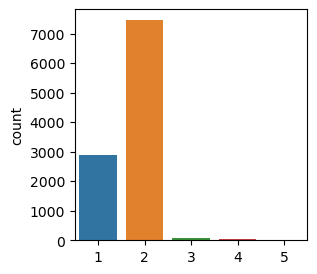

In [78]:
plt.figure(figsize=(3, 3))
sns.countplot(x=df.groupby("barcode").size())
# plt.yscale("log")
plt.show()


Filter to only barcodes with multiplicity two.

In [79]:
df = df.groupby("barcode").filter(lambda x: len(x.index) == 2)

## Load DMS data

In [80]:
dms_df = pd.read_csv("https://media.githubusercontent.com/media/jbloomlab/Ab-CGGnaive_DMS/main/results/final_variant_scores/final_variant_scores.csv", index_col="mutation", dtype=dict(position_IMGT=pd.Int16Dtype()))
# remove linker sites
dms_df = dms_df[dms_df.chain != "link"]
# add indicator for wildtype data
dms_df["WT"] = dms_df.wildtype == dms_df.mutant
assert dms_df.position_IMGT.max() < 1000
dms_df["site"] = [f"{chain}-{str(pos).zfill(3)}" for chain, pos in zip(dms_df.chain, dms_df.position_IMGT)]
dms_df

,target,wildtype,position,position_IMGT,chain,annotation,mutant,codon,single_nt,bind_CGG,...,expr,delta_expr,n_bc_expr,n_libs_expr,psr,delta_psr,n_bc_psr,n_libs_psr,WT,site
mutation,,,,,,,,,,,,,,,,,,,,,
E1(H)A,CGG_naive,E,1,1,H,FWRH1,A,GAG,True,10.48829,...,10.44614,-0.00453,19.0,2.0,6.78608,-0.07452,17.0,2.0,False,H-001
E1(H)C,CGG_naive,E,1,1,H,FWRH1,C,GAG,False,10.44477,...,10.32364,-0.12703,20.0,2.0,7.44234,0.58174,17.0,2.0,False,H-001
E1(H)D,CGG_naive,E,1,1,H,FWRH1,D,GAG,True,10.42771,...,10.51618,0.06551,16.0,2.0,6.95940,0.09880,13.0,2.0,False,H-001
E1(H)E,CGG_naive,E,1,1,H,FWRH1,E,GAG,True,10.45719,...,10.45067,0.00000,21170.0,2.0,6.86060,0.00000,18910.0,2.0,True,H-001
E1(H)F,CGG_naive,E,1,1,H,FWRH1,F,GAG,False,10.51899,...,10.33163,-0.11904,24.0,2.0,6.91372,0.05313,21.0,2.0,False,H-001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R128(L)S,CGG_naive,R,235,128,L,FWRL4,S,CGT,True,10.44756,...,10.54313,0.09246,39.0,2.0,6.93925,0.07866,33.0,2.0,False,L-128
R128(L)T,CGG_naive,R,235,128,L,FWRL4,T,CGT,False,10.43023,...,10.53860,0.08793,36.0,2.0,6.88956,0.02896,34.0,2.0,False,L-128
R128(L)V,CGG_naive,R,235,128,L,FWRL4,V,CGT,False,10.38231,...,10.48707,0.03640,27.0,2.0,6.78160,-0.07899,24.0,2.0,False,L-128


### Load naive sequence with IMGT numbering

In [81]:
pos_df = pd.read_csv("https://raw.githubusercontent.com/jbloomlab/Ab-CGGnaive_DMS/main/data/CGGnaive_sites.csv", dtype=dict(site=pd.Int16Dtype()), index_col="site_scFv")
pos_df

,amino_acid,chain,site,KI_codon,annotation
site_scFv,,,,,
1,E,H,1,GAG,FWRH1
2,V,H,2,GTG,FWRH1
3,Q,H,3,CAG,FWRH1
4,L,H,4,CTT,FWRH1
5,Q,H,5,CAG,FWRH1
...,...,...,...,...,...
231,L,L,124,CTA,FWRL4
232,E,L,125,GAA,FWRL4
233,I,L,126,ATA,FWRL4


In [82]:
naive_H = "".join(pos_df.query("chain == 'H'").amino_acid)
naive_H, len(naive_H)

('EVQLQESGPSLVKPSQTLSLTCSVTGDSITSGYWNWIRKFPGNKLEYMGYISYSGSTYYNPSLKSRISITRDTSKNQYYLQLNSVTTEDTATYYCARDFDVWGAGTTVTVSS',
 112)

In [83]:
# note extra R at end of scFv sequence, which we exclude below
naive_L = "".join(pos_df.query("chain == 'L'").amino_acid)[:-1]
naive_L, len(naive_L)

('DIVMTQSQKFMSTSVGDRVSVTCKASQNVGTNVAWYQQKPGQSPKALIYSASYRYSGVPDRFTGSGSGTDFTLTISNVQSEDLAEYFCQQYNSYPLTFGSGTKLEIK',
 107)

### Add full length amino-acid and nucleotide sequence to the 10x data frame

In [84]:
df["aa_seq"] = df.fwr1 + df.cdr1 + df.fwr2 + df.cdr2 + df.fwr3 + df.cdr3 + df.fwr4
df["nt_seq"] = df.fwr1_nt + df.cdr1_nt + df.fwr2_nt + df.cdr2_nt + df.fwr3_nt + df.cdr3_nt + df.fwr4_nt

### Distribution of sequence lengths

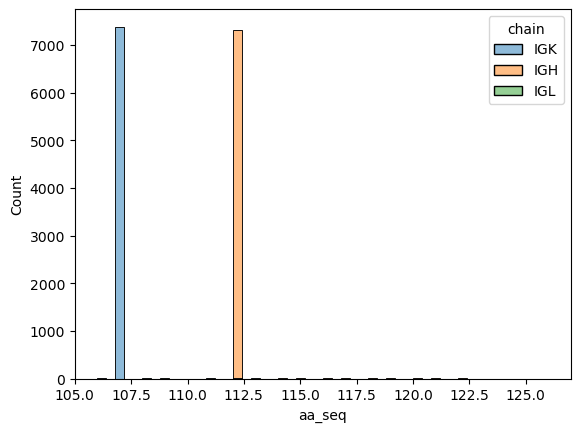

In [85]:
sns.histplot(x=df.aa_seq.str.len(), hue=df.chain)
# plt.yscale("log")
plt.show()

In [86]:
df.aa_seq.str.len().value_counts()

aa_seq
107    7381
112    7323
119      24
106      24
121      23
120      18
118      17
111      12
109      11
122      11
115       9
117       9
116       8
113       8
108       6
114       5
126       4
123       4
124       4
110       2
125       1
Name: count, dtype: int64

Filter to only sequences with the expected length of each chain

In [87]:
# Filter to only sequences with the expected length of each chain
df = df.loc[((df.chain == 'IGH') & (df.aa_seq.str.len() == len(naive_H))) | ((df.chain == 'IGK') & (df.aa_seq.str.len() == len(naive_L)))].reset_index(drop=True)

## Assign amino-acid mutations and additive phenotypes to 10x sequences

**Note**: we do not attempt to pair heavy and light chains from the same cell, so phenotypes are assigned to each chain independently.
Under an additive model, the values for each chain can be added to get the phenotype for the BCR

In [88]:
def get_mutations(naive_aa, aa, pos_map, chain_annotation):
    assert len(naive_aa) == len(aa)
    return [f"{aa1}{pos_map[pos]}{chain_annotation}{aa2}"
            for pos, (aa1, aa2) in enumerate(zip(naive_aa, aa))
            if aa1 != aa2]

In [89]:
pos_map_H = pos_df.loc[pos_df.chain == "H", "site"].reset_index(drop=True)
pos_map_L = pos_df.loc[pos_df.chain == "L", "site"].reset_index(drop=True)

In [90]:
for idx in df.index:
     if df.chain[idx] == "IGH":
          mutations = get_mutations(naive_H, df.aa_seq[idx], pos_map_H, "(H)")          
     elif df.chain[idx] == "IGK":
          mutations = get_mutations(naive_L, df.aa_seq[idx], pos_map_L, "(L)")
     else:
          print(f"skipping unexpected chain length {df.chain[idx]} {len(df.aa_seq[idx])}")
          continue

     df.loc[idx, "mutations"] = ",".join(mutations)
     df.loc[idx, "n_mutations"] = len(mutations)
     df.loc[idx, "delta_bind_CGG"] = dms_df.delta_bind_CGG[mutations].sum()
     df.loc[idx, "delta_expr"] = dms_df.delta_expr[mutations].sum()
     df.loc[idx, "delta_psr"] = dms_df.delta_psr[mutations].sum()

df.n_mutations = df.n_mutations.astype("Int64")

df

,barcode,is_cell,contig_id,high_confidence,length,chain,v_gene,d_gene,j_gene,c_gene,...,raw_consensus_id,exact_subclonotype_id,library,aa_seq,nt_seq,mutations,n_mutations,delta_bind_CGG,delta_expr,delta_psr
0,AAACCTGAGAATCTCC-1,True,AAACCTGAGAATCTCC-1_contig_1,True,504,IGK,IGKV6-15,NaN,IGKJ4,IGKC,...,clonotype1_consensus_2,1999,1,DIVMTQSQKFMSTSVGDRVSVTCKASQNVGTNVGWYQQKPGQSPKA...,GACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAG...,A40(L)G,1,0.85566,0.00031,-0.19452
1,AAACCTGAGAATCTCC-1,True,AAACCTGAGAATCTCC-1_contig_2,True,527,IGH,IGHV3-8,NaN,IGHJ1,IGHG2B,...,clonotype1_consensus_1,1999,1,EVQLQESGPSLVKPSQTLSLTCSVTGDSITSGYWNWIRKFPGNKLE...,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTC...,Y67(H)S,1,0.00135,-0.04634,0.03864
2,AAACCTGAGATGTTAG-1,True,AAACCTGAGATGTTAG-1_contig_1,True,671,IGH,IGHV3-8,NaN,IGHJ1,IGHM,...,clonotype1_consensus_1,1569,1,EVQLQESGPSLVKPSQTLSLTCSVTGDSITSGYWNWIRKFPGNKLE...,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTC...,,0,0.00000,0.00000,0.00000
3,AAACCTGAGATGTTAG-1,True,AAACCTGAGATGTTAG-1_contig_2,True,525,IGK,IGKV6-15,NaN,IGKJ4,IGKC,...,clonotype1_consensus_2,1569,1,DIVMTQSQKFMSTSVGDRVSVTCKASQNVGTNVAWYQQKPGQSPKA...,GACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAG...,"G80(L)E,L116(L)P",2,-0.84078,-0.72872,-0.06667
4,AAACCTGAGCCGCCTA-1,True,AAACCTGAGCCGCCTA-1_contig_1,True,531,IGK,IGKV6-15,NaN,IGKJ4,IGKC,...,clonotype1_consensus_2,26,1,DIVMTQSQKFMSTSVGDRVSVTCKASQNVGTNVAWYQQKPGQSPKA...,GACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAG...,,0,0.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14684,TTTGTCACATACTACG-1,True,TTTGTCACATACTACG-1_contig_2,True,529,IGK,IGKV6-15,NaN,IGKJ4,IGKC,...,clonotype1_consensus_2,577,3,DIVMTQSQKFMSTSVGDRVSVTCKASQNVGTNVGWHQQKPGQSPKA...,GACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAG...,"A40(L)G,Y42(L)H,N108(L)K",3,1.58902,-0.50387,0.13111
14685,TTTGTCATCATGGTCA-1,True,TTTGTCATCATGGTCA-1_contig_1,True,553,IGH,IGHV3-8,NaN,IGHJ1,IGHG2C,...,clonotype1_consensus_1,890,3,EVQLQGSGPSLVKPSQTLSLTCSVTGDSITSGYWNWIRKFPGNKLE...,GAGGTGCAGCTTCAGGGGTCAGGACCTAGCCTCGTGAAACCTTCTC...,"E6(H)G,S64(H)R,A105(H)G",3,1.25561,0.05877,0.43471
14686,TTTGTCATCATGGTCA-1,True,TTTGTCATCATGGTCA-1_contig_2,True,508,IGK,IGKV6-15,NaN,IGKJ4,IGKC,...,clonotype1_consensus_2,890,3,DIVMTQSQKFMSTSVGDRVSVTCKASQNVGTNVGWYQQKPGQSPKA...,GACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAG...,A40(L)G,1,0.85566,0.00031,-0.19452
14687,TTTGTCATCTTCATGT-1,True,TTTGTCATCTTCATGT-1_contig_1,True,555,IGH,IGHV3-8,NaN,IGHJ1,IGHG2C,...,clonotype1_consensus_1,377,3,EVQLQESGPSLVKPSQTLSLTCSVTGDSITSGYWNWFRKFPGNKLE...,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTC...,"I42(H)F,Y52(H)F,Y67(H)S,A105(H)G",4,-6.25832,-0.19634,0.48515


In [91]:
df.query("chain == 'IGH'")['nt_seq'].str.split("", expand=True).iloc[:, 1:-1].apply(pd.Series.value_counts)

def consensus_string(series):
    consensus = ''
    for i in range(len(series.iloc[0])):
        # Get the ith character of each string in the series
        chars = series.apply(lambda x: x[i])
        # Find the most frequent character at this position
        consensus += chars.mode()[0]
    return consensus

# Apply the function to the series
bar = consensus_string(df.query("chain == 'IGH'")['nt_seq'])

## Pair heavy and light seqs

In [92]:
df = df.query("chain == 'IGH'").merge(df.query("chain == 'IGK'"), on=["barcode", "library"], how="inner", suffixes=("_H", "_L"))

df["delta_bind_CGG"] = df.delta_bind_CGG_H + df.delta_bind_CGG_L
df["delta_expr"] = df.delta_expr_H + df.delta_expr_L
df["delta_psr"] = df.delta_psr_H + df.delta_psr_L
df["n_mutations"] = df.n_mutations_H + df.n_mutations_L
df["nt_seq"] = df.nt_seq_H + df.nt_seq_L

Plot mutation counts

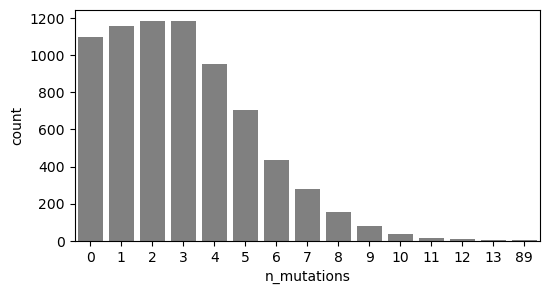

In [93]:
plt.figure(figsize=(6, 3))
sns.countplot(x=df.n_mutations, color="grey")
plt.show()

Filter the very large mutation sequence as a probable error

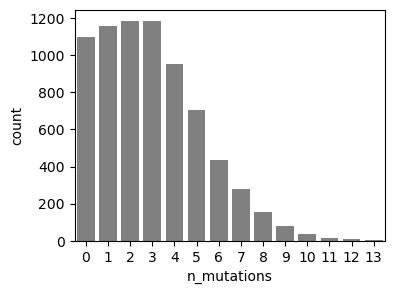

In [94]:
df = df.query("n_mutations < 50").reset_index(drop=True)

plt.figure(figsize=(4, 3))
sns.countplot(x=df.n_mutations, color="grey")
plt.show()

In [95]:
assert set((df.aa_seq_H + df.aa_seq_L).str.len().unique()) == {len(naive_H) + len(naive_L)}

## Read metadata on mice/times

In [96]:
metadata = pd.read_excel("data/10x/Timecourse_Novaseqvdj/AV_VDJ_GEX_metadata.xlsx")[["Unnamed: 0", "orig.ident", "Timecourse", "Mouse.ID"]]
metadata["barcode"] = metadata["Unnamed: 0"].str.split("_").str[0]
metadata["library"] = metadata["orig.ident"].str[-1].astype(int)
metadata["time (days)"] = metadata.Timecourse.str.split("Day").str[1]
metadata["mouse"] = "D" + metadata.Timecourse.str.split("Day").str[-1] + metadata["Mouse.ID"]
metadata.drop(columns=["Unnamed: 0", "orig.ident", "Mouse.ID", "Timecourse"], inplace=True)

metadata

,barcode,library,time (days),mouse
0,AAACCTGAGAATCTCC-1,1,14,D14M1
1,AAACCTGAGCCGCCTA-1,1,8,D8M1
2,AAACCTGAGTGCGTGA-1,1,11,D11M1
3,AAACCTGCAAATACAG-1,1,17,D17M1
4,AAACCTGCAGTACACT-1,1,8,D8M4
...,...,...,...,...
9740,TTTGTCACACGACGAA-1,3,14,D14M3
9741,TTTGTCACATACTACG-1,3,11,D11M3
9742,TTTGTCAGTTCCGTCT-1,3,11,D11M3
9743,TTTGTCATCATGGTCA-1,3,17,D17M4


Merge with sequence data on barcode and library

In [97]:
df = df.merge(metadata, how="left", on=["barcode", "library"])
df

,barcode,is_cell_H,contig_id_H,high_confidence_H,length_H,chain_H,v_gene_H,d_gene_H,j_gene_H,c_gene_H,...,delta_bind_CGG_L,delta_expr_L,delta_psr_L,delta_bind_CGG,delta_expr,delta_psr,n_mutations,nt_seq,time (days),mouse
0,AAACCTGAGAATCTCC-1,True,AAACCTGAGAATCTCC-1_contig_2,True,527,IGH,IGHV3-8,NaN,IGHJ1,IGHG2B,...,0.85566,0.00031,-0.19452,0.85701,-0.04603,-0.15588,2,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTC...,14,D14M1
1,AAACCTGAGATGTTAG-1,True,AAACCTGAGATGTTAG-1_contig_1,True,671,IGH,IGHV3-8,NaN,IGHJ1,IGHM,...,-0.84078,-0.72872,-0.06667,-0.84078,-0.72872,-0.06667,2,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTC...,NaN,NaN
2,AAACCTGAGCCGCCTA-1,True,AAACCTGAGCCGCCTA-1_contig_2,True,542,IGH,IGHV3-8,NaN,IGHJ1,IGHG1,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTC...,8,D8M1
3,AAACCTGCAGTACACT-1,True,AAACCTGCAGTACACT-1_contig_1,True,671,IGH,IGHV3-8,NaN,IGHJ1,IGHM,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTC...,8,D8M4
4,AAACCTGGTCCGACGT-1,True,AAACCTGGTCCGACGT-1_contig_1,True,661,IGH,IGHV3-8,NaN,IGHJ1,IGHM,...,0.85566,0.00031,-0.19452,0.85566,0.00031,-0.19452,1,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTC...,11,D11M1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7293,TTTGGTTTCTTTCCTC-1,True,TTTGGTTTCTTTCCTC-1_contig_1,True,541,IGH,IGHV3-8,NaN,IGHJ1,IGHG1,...,0.99405,0.17718,-0.29861,1.37620,0.15535,-0.34901,9,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTC...,17,D17M3
7294,TTTGTCACACGACGAA-1,True,TTTGTCACACGACGAA-1_contig_1,True,672,IGH,IGHV3-8,NaN,IGHJ1,IGHM,...,-0.02832,-0.05798,0.04810,0.22140,-0.26290,-0.37094,4,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTC...,14,D14M3
7295,TTTGTCACATACTACG-1,True,TTTGTCACATACTACG-1_contig_1,True,551,IGH,IGHV3-8,NaN,IGHJ1,IGHG1,...,1.58902,-0.50387,0.13111,0.82072,-0.64993,0.02096,5,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTC...,11,D11M3
7296,TTTGTCATCATGGTCA-1,True,TTTGTCATCATGGTCA-1_contig_1,True,553,IGH,IGHV3-8,NaN,IGHJ1,IGHG2C,...,0.85566,0.00031,-0.19452,2.11127,0.05908,0.24019,4,GAGGTGCAGCTTCAGGGGTCAGGACCTAGCCTCGTGAAACCTTCTC...,17,D17M4


In [98]:
df["mouse"].value_counts(dropna=False)

mouse
NaN      1573
D8M1      484
D11M1     406
D8M4      400
D17M1     353
D8M2      352
D11M4     326
D14M1     311
D8M3      286
D14M3     266
D11M3     259
D11M2     259
D20M1     255
D14M2     251
D17M3     235
D17M2     228
D20M3     209
D17M4     204
D14M4     188
D20M2     168
D20M4     157
D5M3       78
D5M2       44
D5M4        3
D5M1        3
Name: count, dtype: int64

Why are there so many `NaN` above? It seems there are barcodes missing in the metadata file.

In [99]:
df.loc[df.mouse.isna(), ["library", "barcode"]]

,library,barcode
1,1,AAACCTGAGATGTTAG-1
6,1,AAACGGGAGCACCGTC-1
10,1,AAACGGGTCTGATTCT-1
14,1,AAAGATGTCATGTCTT-1
22,1,AAAGTAGCATTTCAGG-1
...,...,...
7278,3,TTGTAGGTCTATCGCC-1
7280,3,TTTACTGCAGCTGCAC-1
7282,3,TTTACTGTCAGGATCT-1
7287,3,TTTCCTCAGTTCCACA-1


## Affinity distributions

In [100]:
order = sorted(df["time (days)"].dropna().unique(), key=lambda x: int(x))

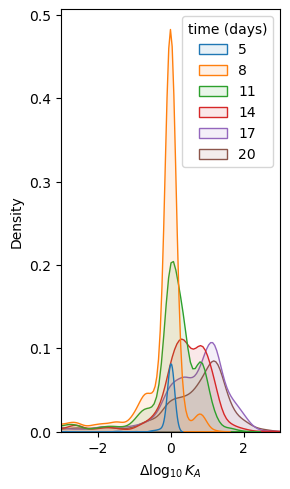

In [101]:
plt.figure(figsize=(3, 5))
sns.kdeplot(data=df, x="delta_bind_CGG", hue="time (days)", hue_order=order, fill=True, common_norm=True, alpha=0.1, bw_adjust=0.6)
plt.xlim(-3, 3)
plt.xlabel("$\Delta\log_{10} K_A$")
plt.tight_layout()
plt.savefig("output/10x/affinity_kde.pdf")
plt.show()

/var/folders/0w/l84hyz3n6ns582pxy6tkt8y80000gn/T/ipykernel_2660/2924417924.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  g = sns.displot(data=df, kind="kde", x="delta_bind_CGG", row="time (days)", hue="mouse", row_order=order, fill=True, common_norm=True, alpha=0.1, bw_adjust=0.5, height=1.25, aspect=2.5, legend=False)
/var/folders/0w/l84hyz3n6ns582pxy6tkt8y80000gn/T/ipykernel_2660/2924417924.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  g = sns.displot(data=df, kind="kde", x="delta_bind_CGG", row="time (days)", hue="mouse", row_order=order, fill=True, common_norm=True, alpha=0.1, bw_adjust=0.5, height=1.25, aspect=2.5, legend=False)
/opt/miniconda3/envs/replay/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/0w/l84hyz3n

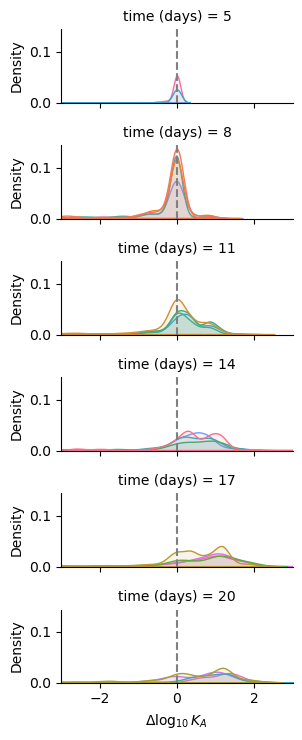

In [102]:
g = sns.displot(data=df, kind="kde", x="delta_bind_CGG", row="time (days)", hue="mouse", row_order=order, fill=True, common_norm=True, alpha=0.1, bw_adjust=0.5, height=1.25, aspect=2.5, legend=False)
plt.xlim(-3, 3)
plt.xlabel("$\Delta\log_{10} K_A$")
for ax in g.axes.flatten():
    ax.axvline(0, color="grey", linestyle="--")
plt.tight_layout()
plt.savefig("output/10x/affinity_kde_stratified.pdf")
plt.show()

/opt/miniconda3/envs/replay/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


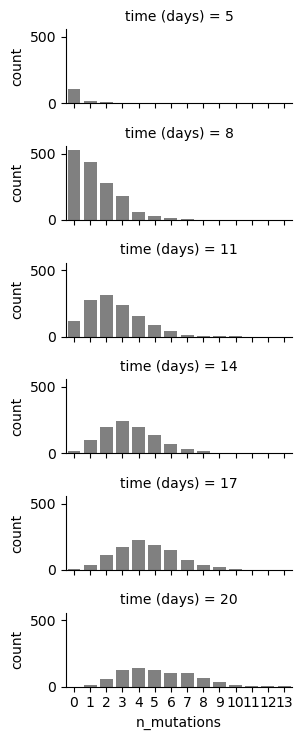

In [103]:
sns.catplot(kind="count", data=df, x="n_mutations", row="time (days)", color="grey", row_order=order, aspect=2.5, height=1.25, legend=False)
plt.show()

In [104]:
df.groupby("time (days)").delta_bind_CGG.mean().loc[order]

time (days)
5    -0.099620
8    -0.391632
11   -0.074919
14    0.204326
17    0.484038
20    0.511950
Name: delta_bind_CGG, dtype: float64

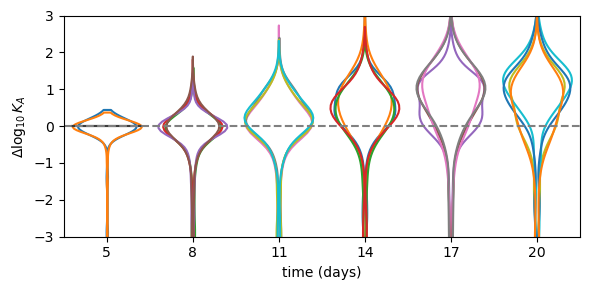

In [105]:
plt.figure(figsize=(6, 3))
ax = sns.violinplot(data=df, y="delta_bind_CGG", x="time (days)", hue=df.mouse.str.split("M").str[-1], order=order, dodge=False, inner=None)
for i, coll in enumerate(ax.collections):
    coll.set_facecolor((0, 0, 0, 0))
    coll.set_edgecolor(f"C{i}")
# sns.lineplot(data=df.groupby("time (days)").delta_bind_CGG.median().loc[order],
#              color="black", linewidth=2)
plt.axhline(0, color="grey", linestyle="--")
# put more space on the right
plt.xlim(-0.5, 5.5)
plt.ylim(-3, 3)
plt.ylabel("$\Delta\log_{10} K_A$")
plt.legend().remove()
plt.tight_layout()
plt.savefig("output/10x/affinity_violin.pdf")
plt.show()

In [115]:
df.groupby(["time (days)", "mouse"]).size()

time (days)  mouse
11           D11M1    406
             D11M2    259
             D11M3    259
             D11M4    326
14           D14M1    311
             D14M2    251
             D14M3    266
             D14M4    188
17           D17M1    353
             D17M2    228
             D17M3    235
             D17M4    204
20           D20M1    255
             D20M2    168
             D20M3    209
             D20M4    157
5            D5M1       3
             D5M2      44
             D5M3      78
             D5M4       3
8            D8M1     484
             D8M2     352
             D8M3     286
             D8M4     400
dtype: int64

In [117]:
summary_stats = df.groupby(["time (days)", "mouse"]).delta_bind_CGG.aggregate(["size", "median", "mean", "var"]).loc[order].reset_index()

# rename columns
summary_stats.rename(columns={"size": "n cells", "median": "affinity median", "mean": "affinity mean", "var": "affinity variance"}, inplace=True)

# drop samples with less than 10 measurements
summary_stats = summary_stats.loc[summary_stats["n cells"] >= 10]

summary_stats

,time (days),mouse,n cells,affinity median,affinity mean,affinity variance
1,5,D5M2,44,0.000000,-0.099596,0.227132
2,5,D5M3,78,0.000000,-0.107296,0.178549
4,8,D8M1,484,0.000000,-0.493972,1.283048
5,8,D8M2,352,0.000000,-0.347154,0.791739
6,8,D8M3,286,0.000000,-0.338322,1.135000
7,8,D8M4,400,0.000000,-0.345059,1.021819
8,11,D11M1,406,0.000000,-0.160626,1.564887
9,11,D11M2,259,0.007070,-0.155102,1.238887
10,11,D11M3,259,0.229920,0.037267,1.081172
11,11,D11M4,326,0.164560,0.006395,1.071865


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


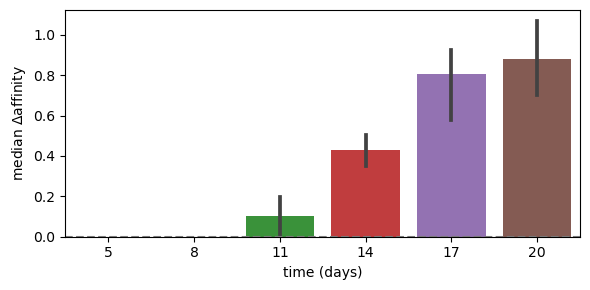

In [130]:
# plot mean and var over time
plt.figure(figsize=(6, 3))
sns.barplot(data=summary_stats, x="time (days)", y="affinity median")
plt.axhline(0, color="grey", linestyle="--")
plt.ylabel("median $\Delta$affinity")
plt.legend().remove()
plt.tight_layout()
plt.show()

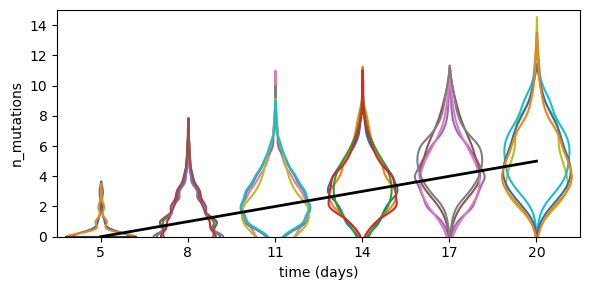

In [37]:
plt.figure(figsize=(6, 3))
ax = sns.violinplot(data=df, y=df.n_mutations.astype(float), x="time (days)", hue=df.mouse.str.split("M").str[-1], order=order, dodge=False, inner=None)
for i, coll in enumerate(ax.collections):
    coll.set_facecolor((0, 0, 0, 0))
    coll.set_edgecolor(f"C{i}")
sns.lineplot(data=df.groupby("time (days)").n_mutations.median().loc[order],
             color="black", linewidth=2)
# put more space on the right
plt.xlim(-0.5, 5.5)
plt.ylim(0, 15)
plt.legend().remove()
plt.tight_layout()
plt.savefig("output/10x/mutations_violin.pdf")
plt.show()

In [38]:
df.groupby("time (days)").size()

time (days)
11    1250
14    1016
17    1020
20     789
5      128
8     1522
dtype: int64

In [39]:
df.groupby(["n_mutations", "time (days)"]).size()

n_mutations  time (days)
0            11             120
             14              16
             17               4
             5              105
             8              530
1            11             278
             14             101
             17              34
             20              10
             5               14
             8              435
2            11             315
             14             201
             17             109
             20              58
             5                6
             8              278
3            11             235
             14             242
             17             172
             20             124
             5                3
             8              179
4            11             154
             14             198
             17             222
             20             141
             8               56
5            11              87
             14             137
             17

### Plots using number of mutations instead of time

In [40]:
df["n_mutations_chunked"] = df.n_mutations.map(lambda x: f"{x}" if x < 8 else "8+")

In [41]:
foo_order = sorted(df["n_mutations_chunked"].unique(), key=lambda x: int(x.split("+")[0]))

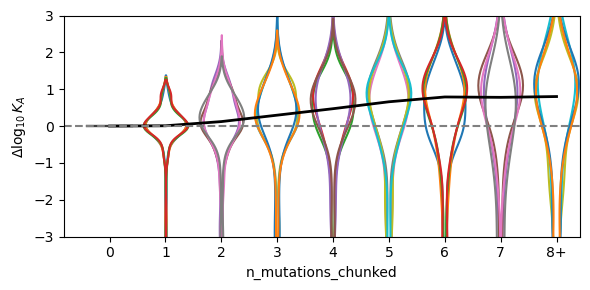

In [42]:
plt.figure(figsize=(6, 3))
ax = sns.violinplot(data=df, y="delta_bind_CGG", x="n_mutations_chunked", order=foo_order, hue=df.mouse.str.split("M").str[-1], dodge=False, inner=None)
for i, coll in enumerate(ax.collections):
    coll.set_facecolor((0, 0, 0, 0))
    coll.set_edgecolor(f"C{i}")
sns.lineplot(data=df.groupby("n_mutations_chunked").delta_bind_CGG.median(),
             color="black", linewidth=2)
plt.axhline(0, color="grey", linestyle="--")
# put more space on the right
# plt.xlim(-0.5, 5.5)
plt.ylim(-3, 3)
plt.ylabel("$\Delta\log_{10} K_A$")
plt.legend().remove()
plt.tight_layout()
plt.savefig("output/10x/affinity_violin_mutations.pdf")
plt.show()

/var/folders/0w/l84hyz3n6ns582pxy6tkt8y80000gn/T/ipykernel_49819/1878721215.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x="delta_bind_CGG", hue="n_mutations_chunked", hue_order=foo_order, fill=True, common_norm=False, alpha=0.1, bw_adjust=0.6)


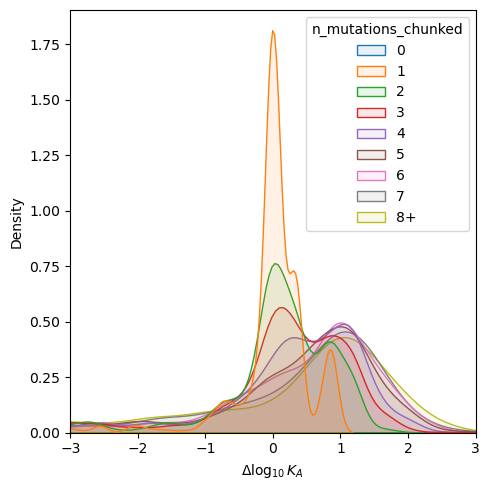

In [43]:
plt.figure(figsize=(5, 5))
sns.kdeplot(data=df, x="delta_bind_CGG", hue="n_mutations_chunked", hue_order=foo_order, fill=True, common_norm=False, alpha=0.1, bw_adjust=0.6)
plt.xlim(-3, 3)
plt.xlabel("$\Delta\log_{10} K_A$")
plt.tight_layout()
plt.savefig("output/10x/affinity_kde_mutations.pdf")
plt.show()

## Write data frame to file

In [44]:
df.to_csv("output/10x/data.csv", index=False)